Analisis de Simple sintonizados




In [1]:
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

def dB(a):
    return 20*np.log10(a)

In [2]:
#Simple Sintonizado
# calcula Q y F
# Simple Sintonizado 
def FiltroSS(fo,BW,m):
    k = list()
    for n in range(m):
        Qi = (((2)**(1/m) -1 )**.5) /((1+BW/2/fo)**2-1)
        Fi = fo 
        k.append((Qi,Fi))
    return k

#Butterworth
def FiltroBT(fo,BW,m):
    k = list()
    for n in range(m):
        Qi = fo/BW/np.sin((2*n+1)/m*np.pi/2)
        Fi = fo - BW/2*np.cos((2*n+1)/m*np.pi/2)
        k.append((Qi,Fi))
    return k

#Chevishev
def FiltroCV(fo,BW,m):
    k = list()
    for n in range(m):
        Qi = (fo/BW/np.sin((2*n+1)/m*np.pi/2))/np.sinh(0.88137/m)
        Fi = fo - BW/2*np.cos((2*n+1)/m*np.pi/2)*np.cosh(0.88137/m)
        k.append((Qi,Fi))
    return k


def SSi(f,a,fo,Q,g):
    return g*a/(1+ (Q*((f/fo)**2-1))**2)**0.5

#Respuesta 
def RSS(freq,   a, fo, Q , g):
    a = np.array([SSi(f,a,fo,Q,g) for f in freq])
    return a

def Filtro( freq,a,kf, g):
    af = [a[i] for i in range(len(a))]
    for (Q,fo) in kf:
        for i, a in enumerate(af):
            af[i] = SSi(freq[i],a,fo,Q,g)
    return af

def plotStage(fci,fcoi,fo,fcos,fcs,fimg,k):
    Ao = dB(Filtro([fo  ],[1],k,1))

    print('|A(',fci/1e6,' MHz)|=',dB(Filtro([fci ],[1],k,1))-Ao, 'dB') 
    print('|A(',fcoi/1e6,' MHz)|=',dB(Filtro([fcoi],[1],k,1))-Ao, 'dB') 
    print('|A(',fcos/1e6,' MHz)|=',dB(Filtro([fcos],[1],k,1))-Ao, 'dB') 
    print('|A(',fcs/1e6 ,' MHz)|=',dB(Filtro([fcs ],[1],k,1))-Ao, 'dB') 
    print('|A(',fimg/1e6,' MHz)|=',dB(Filtro([fimg],[1],k,1))-Ao, 'dB') 

    plt.plot(freq,20*np.log10(Filtro(freq,atest,k,1)))

    plt.plot(fimg,dB(Filtro([fimg],[1],k,1)) ,'ro')
    plt.plot(fci ,dB(Filtro([fci ],[1],k,1)) ,'go')
    plt.plot(fcs ,dB(Filtro([fcs ],[1],k,1)) ,'go')
    plt.plot(fcos,dB(Filtro([fcos],[1],k,1)) ,'bx')
    plt.plot(fcoi,dB(Filtro([fcoi],[1],k,1)) ,'bx')


In [3]:
#Datos
BWo  = 20e3
fco  = 100e6
fif1 = 10.7e6
fif2 = 455e3
dfch = 50e3
# Foscilador
fol1 = fco  + fif1 
fol2 = fif1 + fif2 

# imagen
fimg1   = fol1+2*fif1
fimg2   = fol2+2*fif2

In [4]:
# Defino el sampleo 
fmax = 500e6         # MHz
Fs   = fmax*2 #Sps 

# Ventana de tiempo del analisis 
StepFourier = 0.001e6 # MHz
T           = 1/StepFourier 

# Array de tiempo 
time  = np.arange(0, T, 1/Fs)

# Numero de elementos de time
nt    = len(time)

# Espectro de la frecuencia
# la separacion de las deltas = 1/T 
freq  =  np.arange(0,fmax,1/T)
atest =  np.array([1 for f in freq]) 

In [5]:
kh = FiltroSS(10e6,0.2e6,2)
print(kh)

[(32.01961457241704, 10000000.0), (32.01961457241704, 10000000.0)]


[(42.74598607924108, 100000000.0), (42.74598607924108, 100000000.0)]
|A( 99.25  MHz)|= [-2.97234116] dB
|A( 99.99  MHz)|= [-0.00063475] dB
|A( 100.01  MHz)|= [-0.00063488] dB
|A( 100.75  MHz)|= [-3.01029996] dB
|A( 132.1  MHz)|= [-60.13158003] dB


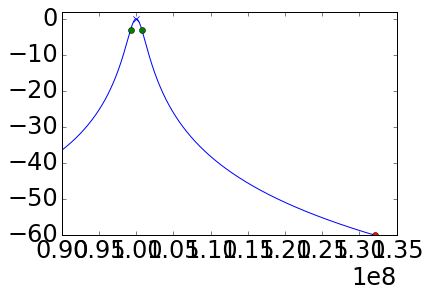

In [11]:
#Filtro RF  para eliminar frecuencia imagen
grf   = 1  # atenuacion
m     = 2  # numero de etapas
BWrf  = 1.5e6 # ancho de banda  
krf = FiltroSS(fco,BWrf,m)
print(krf)

k    = krf
fo   = fco
BW   = BWrf

fol  = fol1
fci  = fo - BW/2
fcs  = fo + BW/2
fcos = fo + BWo/2
fcoi = fo - BWo/2
fimg = fimg1

plotStage(fci,fcoi,fo,fcos,fcs,fimg,k)
plt.xlim([90e6, 135e6])
plt.ylim([-60 , 2])
plt.show()

[(107.00000000000001, 10613397.459621556), (53.5, 10700000.0), (107.00000000000001, 10786602.540378444)]
|A( 10.6  MHz)|= [-2.857594] dB
|A( 10.69  MHz)|= [ 0.0153138] dB
|A( 10.71  MHz)|= [-0.01530846] dB
|A( 10.8  MHz)|= [-3.16201015] dB
|A( 12.065  MHz)|= [-69.71494438] dB


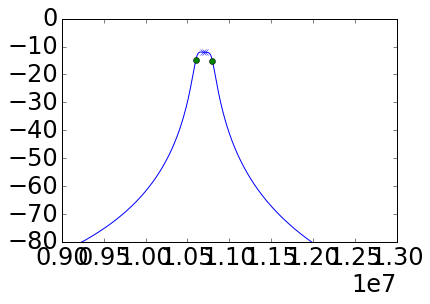

In [13]:
#Filtro 1FI
gif   = 1.  # atenuacion
mi    = 3  # numero de etapas
BWif  = 0.2e6 # ancho de banda  
kif = FiltroBT(fif1,BWif,mi)
print(kif)

BW = BWif
k  = kif
fo = fif1
fci  = fo - BW/2
fcs  = fo + BW/2
fcos = fo + BWo/2
fcoi = fo - BWo/2
fimg = fimg2

plotStage(fci,fcoi,fo,fcos,fcs,fimg,k)
plt.xlim([9e6, 13e6])
plt.ylim([-80 , 0])
plt.show()


[(45.500000000000007, 446339.74596215563), (22.75, 455000.0), (45.500000000000007, 463660.25403784437)]
|A( 0.445  MHz)|= [-2.6495844] dB
|A( 0.445  MHz)|= [-2.6495844] dB
|A( 0.465  MHz)|= [-3.36550811] dB
|A( 0.465  MHz)|= [-3.36550811] dB
|A( 0.505  MHz)|= [-43.30627776] dB


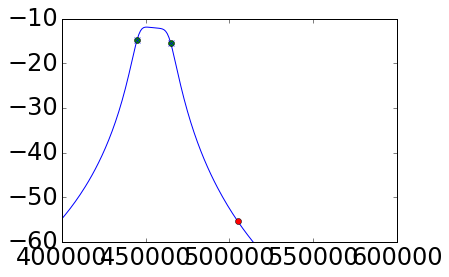

In [8]:
#Filtro 2FI
gif2   = 1.  # atenuacion
mi2    = 3  # numero de etapas
BWif2  = BWo # ancho de banda  
kif2 = FiltroBT(fif2,BWif2,mi2)
print(kif2)

k  = kif2
fo = fif2
BW = BWif2

fci  = fo - BW/2
fcs  = fo + BW/2
fcos = fo + BWo/2
fcoi = fo - BWo/2
fimg = fo + dfch

plotStage(fci,fcoi,fo,fcos,fcs,fimg,k)
plt.xlim([0.4e6, 0.6e6])
plt.ylim([-60 , -10])
plt.show()